In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\\theatre_base.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17161 entries, 0 to 17160
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Код субъекта                                          17161 non-null  int64  
 1   Название субъекта                                     17161 non-null  object 
 2   Код КОПУК                                             17161 non-null  int64  
 3   Название театра                                       17161 non-null  object 
 4   Жанр театра                                           17161 non-null  object 
 5   Код произведения                                      17161 non-null  int64  
 6   Название произведения                                 17161 non-null  object 
 7   Авторы                                                17161 non-null  object 
 8   Жанр произведения                                     17

Данные частично отсутствуют в столбцах 14-17 отсутствует, всё остальное есть.

In [4]:
df.head()

,Код субъекта,Название субъекта,Код КОПУК,Название театра,Жанр театра,Код произведения,Название произведения,Авторы,Жанр произведения,Историко-национальный признак,Национально-территориальный признак,Возрастная категория зрителей,Подчиненность,Дата постановки,"Число спектаклей, всего","Число спектаклей, в том числе на стационаре","Число зрителей, тыс. чел., всего","Число зрителей, тыс. чел., в том числе на стационаре",Идентификатор записи
0,10,Респ. Адыгея,40563,"ГБУК ""Национальный театр Республики Адыгея""",Драматические театры,9897035,Заклинаю-помните,Исупов Т.,Прочие виды и жанры драмтеатра,Российские национальные произведения,Адыгея,Для юношества,Местное,1712,7.0,1.0,1.65,0.21,1
1,10,Респ. Адыгея,40563,"ГБУК ""Национальный театр Республики Адыгея""",Драматические театры,5231058,Женихи,Мамий Е.,Комедия,Российские национальные произведения,Адыгея,Для взрослых,Местное,9912,3.0,1.0,0.30,0.10,2
2,10,Респ. Адыгея,40563,"ГБУК ""Национальный театр Республики Адыгея""",Драматические театры,1004027,Кавказский меловой круг,Брехт Б.,Пьеса,Зарубежные современные произведения,Германия,Для взрослых,Местное,1901,1.0,1.0,0.08,0.08,3
3,10,Респ. Адыгея,40563,"ГБУК ""Национальный театр Республики Адыгея""",Драматические театры,5231079,Гостиница Дахабарины,Мамий Е.,Комедия,Российские современные произведения с 1992 г.,Адыгея,Для взрослых,Местное,511,2.0,NaN,0.08,NaN,4
4,10,Респ. Адыгея,40563,"ГБУК ""Национальный театр Республики Адыгея""",Драматические театры,9710046,600 тысяч рублей,Шортанов А.,Комедия,Российские национальные произведения,Адыгея,Для взрослых,Местное,1110,3.0,2.0,0.27,0.24,5


**Часть 1**

In [5]:
df1 = df.groupby("Название субъекта").agg({"Название театра": lambda x: len(tuple(x.unique()))}).sort_values(by=["Название театра"], ascending=False).drop(['г.Москва', 'г.Санкт-Петербург'], axis = 0).head(10)
df1.columns = ['Количество театров']
df1

,Количество театров
Название субъекта,
Московская обл.,27
Респ. Татарстан,18
Свердловская обл.,17
Самарская обл.,16
Челябинская обл.,16
Респ. Башкортостан,14
Красноярский край,14
Пермский край,13
Нижегородская обл.,13


**Ответ:** в Московской области, республике Татарстан, Свердловской, Самарской, Челябинской областях, республике Башкортастан, Красноярском и Пермском крае, Нижегородской области, республике Дагестан находятся больше всего театров.

Text(0.5, 0, 'Субъект РФ')

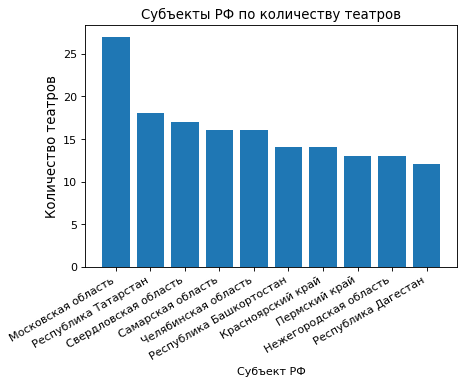

In [17]:
plt.figure(dpi= 80)
plt.bar(
    x=["Московская область", "Республика Татарстан", "Свердловская область", "Самарская область", "Челябинская область", "Республика Башкортостан", "Красноярский край", "Пермский край", "Нежегородская область","Республика Дагестан"],
    height=[27, 18, 17, 16, 16, 14, 14, 13, 13, 12]
)

plt.xticks(rotation=30, horizontalalignment="right")
plt.title("Субъекты РФ по количеству театров", fontsize=12)
plt.ylabel("Количество театров", fontsize=12)
plt.xlabel("Субъект РФ")

In [18]:
df_new = df.groupby("Название произведения").agg({"Название субъекта": lambda x: len(tuple(x.unique()))}).sort_values(by=["Название субъекта"], ascending=False)
df_new.columns = ['Количество театров']
df_new

,Количество театров
Название произведения,
Новогоднее представление,64
Снежная королева,62
Концерт,58
Гуси-лебеди,56
Дюймовочка,54
...,...
Красная шапочка и волк,1
Красная каска,1
Красная Шапочка. Перезагрузка,1


**Ответ:** "Новогоднее представление"

In [19]:
df_new = df.loc[df["Название произведения"] == "Анна Каренина"]
df_new.head(5)

,Код субъекта,Название субъекта,Код КОПУК,Название театра,Жанр театра,Код произведения,Название произведения,Авторы,Жанр произведения,Историко-национальный признак,Национально-территориальный признак,Возрастная категория зрителей,Подчиненность,Дата постановки,"Число спектаклей, всего","Число спектаклей, в том числе на стационаре","Число зрителей, тыс. чел., всего","Число зрителей, тыс. чел., в том числе на стационаре",Идентификатор записи
571,40,Респ. Бурятия,48137,"АУК ""Бурятский республиканский театр кукол ""Ул...",Театры кукол,8625526,Анна Каренина,Толстой Л.,Драма,Русские классические произведения,Россия,Для взрослых,Местное,2009,NaN,NaN,NaN,NaN,572
3521,310,Краснодарский край,40784,ГАУК КК «КТО «Премьера» им. Л.Г.Гатова»,Музыкальные театры,9302263,Анна Каренина,Чайковский П.,Балет,Русские классические произведения,Россия,Для взрослых,Местное,1410,1.0,1.0,1.3,1.3,3522
3999,330,Пермский край,45923,"ГКБУК ""Пермский академический Театр-Театр""",Драматические театры,8625526,Анна Каренина,Толстой Л.,Драма,Русские классические произведения,Россия,Для взрослых,Местное,1205,4.0,4.0,1.5,1.5,4000
4188,330,Пермский край,46004,"МАУК ""Березниковский драматический театр""",Драматические театры,8625526,Анна Каренина,Толстой Л.,Драма,Русские классические произведения,Россия,Для взрослых,Местное,2009,7.0,7.0,1.0,1.0,4189
4315,350,Приморский край,40949,"ГАУК ""Крайдрамтеатр им.М.Горького""",Драматические театры,8625526,Анна Каренина,Толстой Л.,Драма,Русские классические произведения,Россия,Для взрослых,Местное,1311,2.0,2.0,0.5,0.5,4316


In [20]:
df_new.fillna(0)
df_genres = df_new.groupby("Жанр произведения")["Число зрителей, тыс. чел., всего"].sum()
df_genres

Жанр произведения
Балет           12.42
Драма           76.50
Инсценировка     0.33
Name: Число зрителей, тыс. чел., всего, dtype: float64

<AxesSubplot:ylabel='Число зрителей, тыс. чел., всего'>

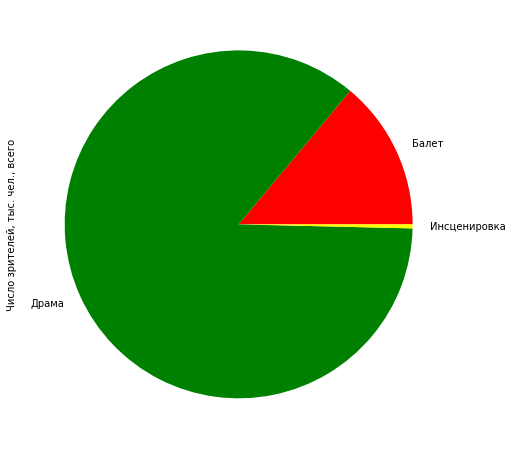

In [24]:
df_genres.plot.pie(y="Жанр произведения", figsize=(8, 8), colors = ['red', 'green', 'yellow'])

**Ответ:** см. график -- "Анна Каренина" как балет, драма, инсценировка.

*Облако слов*

In [25]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize
morph = MorphAnalyzer()

In [26]:
! pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
stops = set(stopwords.words('russian'))

In [28]:
def lemma(x):
    if type(x) is not str:
        return ""
    name = wordpunct_tokenize(x)
    answer = []
    for word in name:
        if word.isalpha():
            final_word = morph.parse(word)[0].normal_form
            if final_word not in stops:
                answer.append(final_word)
    return " ".join(answer)

text = ' '.join(df["Название произведения"].apply(lemma).values)

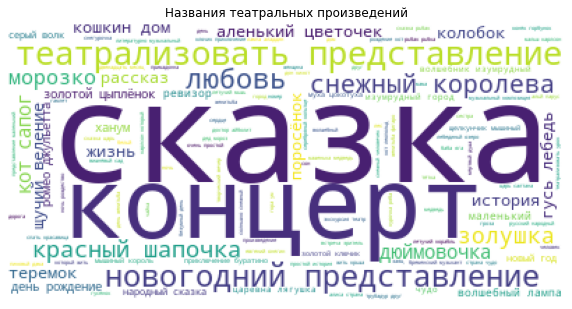

In [36]:
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Названия театральных произведений')
plt.show()